# Profil voznika povzročiteljev prometnih nesreč

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data19 = pd.read_csv('./Podatki/pn2019.csv', delimiter=';', encoding='mbcs')
data20 = pd.read_csv('./Podatki/pn2020.csv', delimiter=';', encoding='mbcs')

data = pd.concat([data19, data20])
data["VoznStazM"] = data['VozniskiStazVLetih'] * 12 + data['VozniskiStazVMesecih'] 
data.columns

Index(['ZaporednaStevilkaPN', 'KlasifikacijaNesrece', 'UpravnaEnotaStoritve',
       'DatumPN', 'UraPN', 'VNaselju', 'Lokacija', 'VrstaCesteNaselja',
       'SifraCesteNaselja', 'TekstCesteNaselja', 'SifraOdsekaUlice',
       'TekstOdsekaUlice', 'StacionazaDogodka', 'OpisKraja', 'VzrokNesrece',
       'TipNesrece', 'VremenskeOkoliscine', 'StanjePrometa', 'StanjeVozisca',
       'VrstaVozisca', 'GeoKoordinataX', 'GeoKoordinataY',
       'ZaporednaStevilkaOsebeVPN', 'Povzrocitelj', 'Starost', 'Spol',
       'UEStalnegaPrebivalisca', 'Drzavljanstvo', 'PoskodbaUdelezenca',
       'VrstaUdelezenca', 'UporabaVarnostnegaPasu', 'VozniskiStazVLetih',
       'VozniskiStazVMesecih', 'VrednostAlkotesta',
       'VrednostStrokovnegaPregleda', 'VoznStazM'],
      dtype='object')

# Profil povzrociteljev nesrece


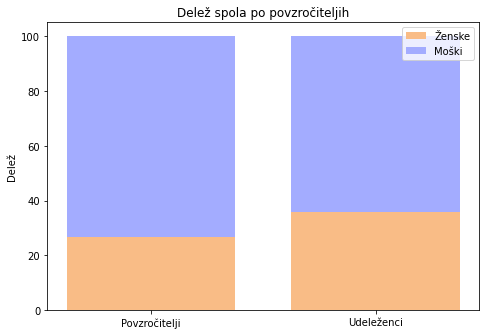

In [2]:
povz = data[data.Povzrocitelj == 'POVZROÈITELJ']
ude = data[data.Povzrocitelj == 'UDELEŽENEC']
x = [sum(povz.Spol == 'ŽENSKI'), sum(povz.Spol == 'MOŠKI'), sum(ude.Spol == 'ŽENSKI'), sum(ude.Spol == 'MOŠKI')]

ind = ['Povzročitelji', 'Udeleženci']
moski = (x[1]/(x[1]+x[0])*100, x[3]/(x[3]+x[2])*100)
zenske = (x[0]/(x[1]+x[0])*100, x[2]/(x[3]+x[2])*100)
width = 0.75
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(ind, zenske, width, color='#f9bc86')
ax.bar(ind, moski, width, bottom=zenske, color='#a3acff')
ax.set_ylabel('Delež')
ax.set_title('Delež spola po povzročiteljih')
#ax.set_xticks(ind, ('P', 'U'))
#ax.set_yticks(np.arange(0, 81, 10))
ax.legend(labels=['Ženske', 'Moški'])
plt.show()

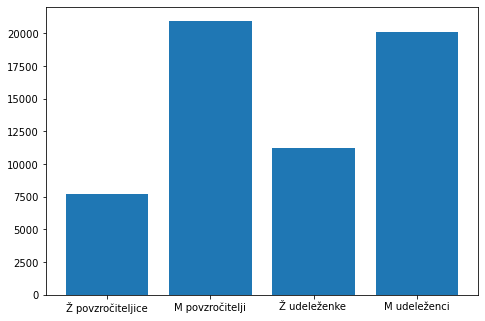

In [3]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
lbls = ['Ž povzročiteljice', 'M povzročitelji', 'Ž udeleženke ', 'M udeleženci']
ax.bar(lbls, x)
plt.show()




**Po analizi povzročiteljev nesreč po spolu, je jasno, da so moški bolj verjetno povzročitelji kot ženske.**



In [32]:
starost=[]
for i in range(0, 101, 5):
    starost.append(len(data.Starost[(data.Starost>=i) & (data.Starost<(i+10)) & (data.Povzrocitelj == "POVZROÈITELJ")]))

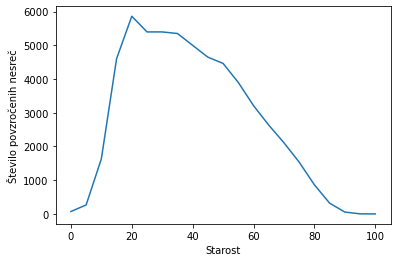

In [34]:
plt.plot(range(0,101, 5),starost)
plt.xlabel("Starost")
plt.ylabel("Število povzročenih nesreč");

**Povzročitelji prometnih nesreč so najbolj pogosto mladi stari okrog 20 let. Iz grafa se jasno vidi, da s starostjo povzročiteljev število povzročenih nesreč pada.**

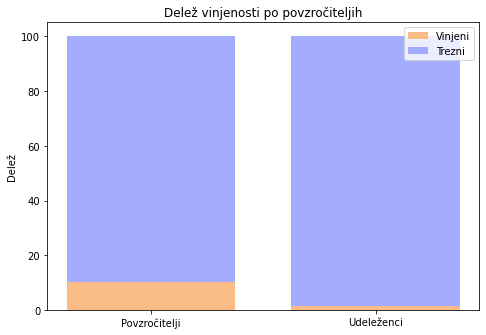

**Delež vinjenih povzročiteljev je očitno višji kot udeležencev**

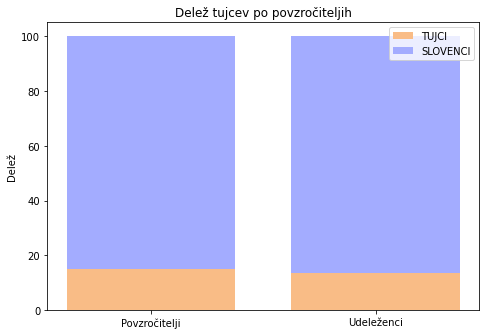

In [38]:
x = [sum(povz.Drzavljanstvo != 'SLOVENIJA'), sum(povz.Drzavljanstvo == 'SLOVENIJA'), sum(ude.Drzavljanstvo != 'SLOVENIJA'), sum(ude.Drzavljanstvo == 'SLOVENIJA')]

ind = ['Povzročitelji', 'Udeleženci']
moski = (x[1]/(x[1]+x[0])*100, x[3]/(x[3]+x[2])*100)
zenske = (x[0]/(x[1]+x[0])*100, x[2]/(x[3]+x[2])*100)
width = 0.75
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(ind, zenske, width, color='#f9bc86')
ax.bar(ind, moski, width, bottom=zenske, color='#a3acff')
ax.set_ylabel('Delež')
ax.set_title('Delež tujcev po povzročiteljih')
#ax.set_xticks(ind, ('P', 'U'))
#ax.set_yticks(np.arange(0, 81, 10))
ax.legend(labels=['TUJCI', 'SLOVENCI'])
plt.show()

**Ali je voznik tujec ne vpliva na povzročitev nesreče.**

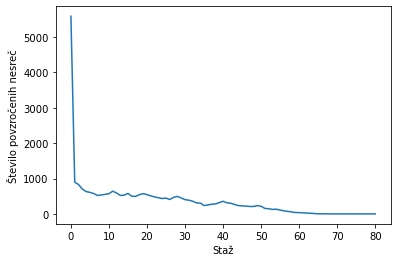

In [43]:
staz=[]
for i in range(0, 81):
    staz.append(len(data.Starost[(data.VoznStazM>=i*12) & (data.VoznStazM<(i*12+12)) & (data.Povzrocitelj == "POVZROÈITELJ")]))
    
plt.plot(range(0,81),staz)
plt.xlabel("Staž")
plt.ylabel("Število povzročenih nesreč");

**Iz grafa je razvidno, da z vozniškimi izkušnjami verjetnost za povzročitev nesreče pada. Pri 0 je veliko odstopanje, kar lahko pomeni, da so neznane vrednosti predstavljene kot 0, čeprav to ni omenjeno v opombah.**